In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./data/blocks.parquet')[['geometry']]
blocks_gdf.head()

,geometry
0,"POLYGON ((354918.622 6625258.829, 354901.464 6..."
1,"POLYGON ((355412.142 6623378.149, 355411.7 662..."
2,"POLYGON ((353934.329 6625429.433, 353923.453 6..."
3,"POLYGON ((355099.099 6623847.765, 355074.808 6..."
4,"POLYGON ((352766.168 6621954.748, 352744.412 6..."


In [2]:
from my_package.methods.spatial_tagger import SpatialTagger

blocks_gdf = SpatialTagger(blocks_gdf).run()

2025-01-18 15:30:29.560 | INFO     | my_package.methods.spatial_tagger:_fetch_osm:35 - Fetching OSM data
2025-01-18 15:31:09.384 | SUCCESS  | my_package.methods.spatial_tagger:_fetch_osm:40 - OSM data fetched
2025-01-18 15:31:09.668 | INFO     | my_package.methods.spatial_tagger:_process_osm:85 - Processing OSM data
100%|██████████| 4/4 [00:06<00:00,  1.57s/it]
2025-01-18 15:31:15.967 | SUCCESS  | my_package.methods.spatial_tagger:_process_osm:103 - OSM data processed
2025-01-18 15:31:16.029 | INFO     | my_package.methods.spatial_tagger:_get_tags:140 - Getting tags
100%|██████████| 3/3 [00:00<00:00, 10.96it/s]
2025-01-18 15:31:17.862 | SUCCESS  | my_package.methods.spatial_tagger:_get_tags:169 - Tags obtained


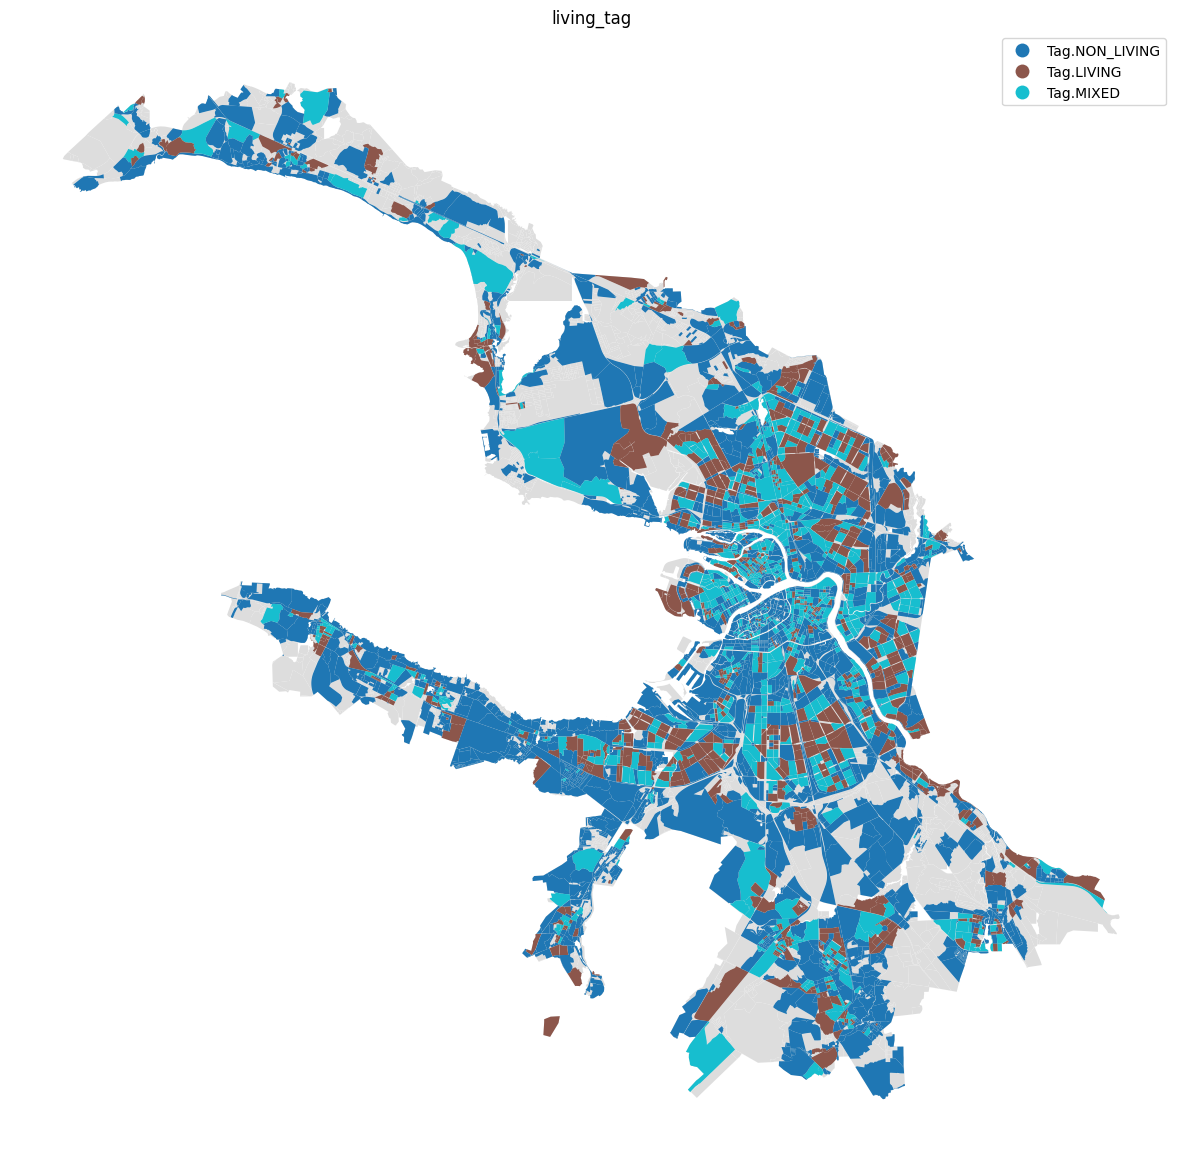

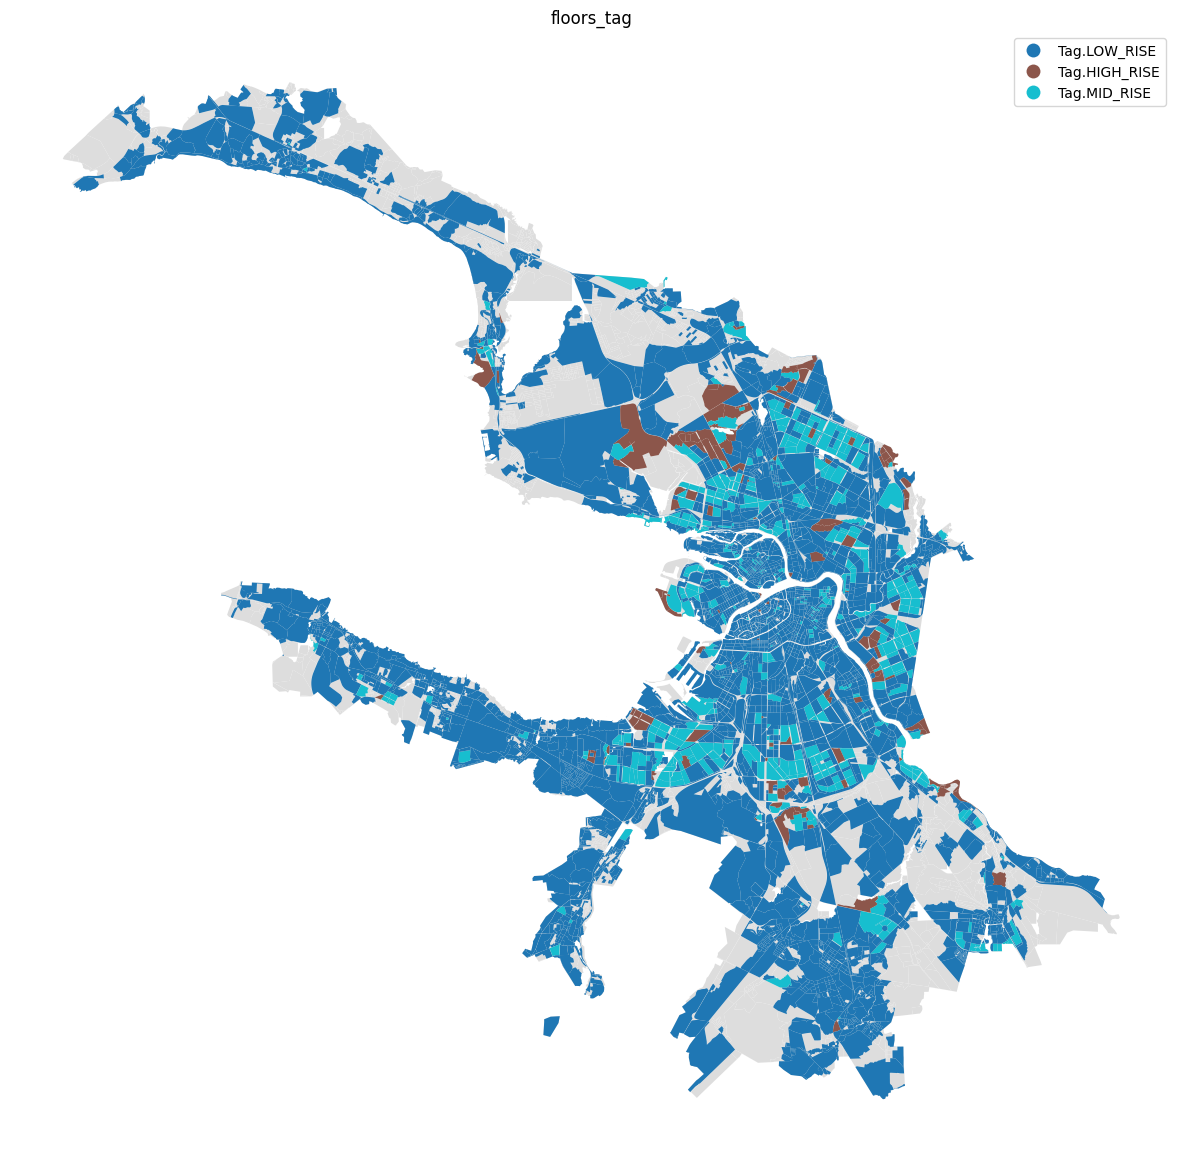

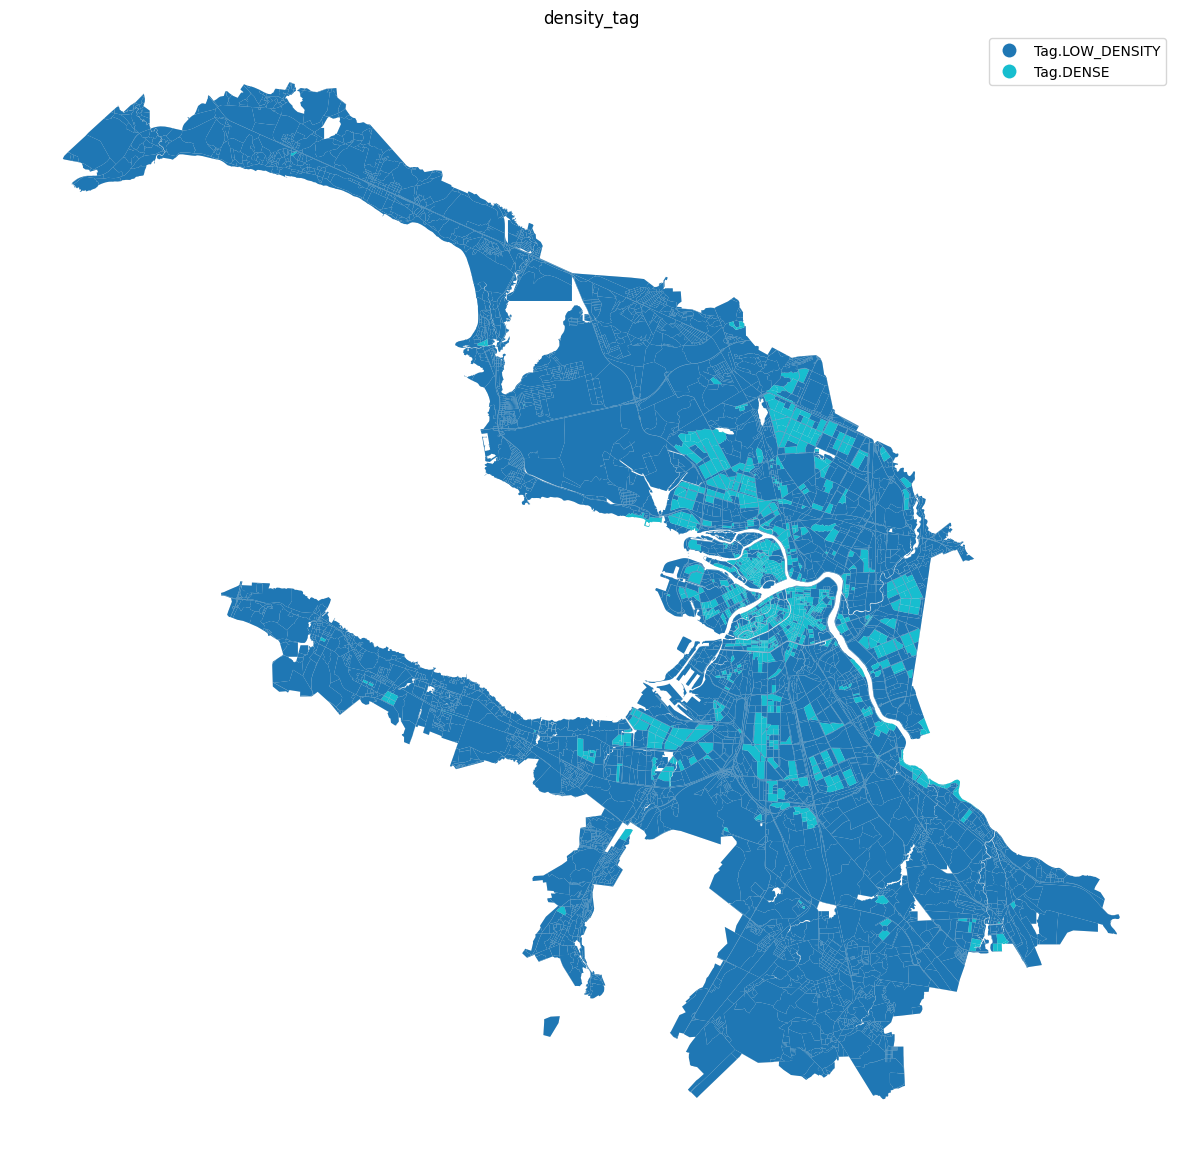

In [3]:
for tag_column in ['living_tag', 'floors_tag', 'density_tag']:
    ax = blocks_gdf.plot(color='#ddd', figsize=(15,15))
    blocks_gdf.plot(column=tag_column, legend=True, ax=ax).set_axis_off()
    ax.set_title(tag_column)